In [2]:
pip --version

pip 23.2.1 from C:\Users\Dhara\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import random
import matplotlib .pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten

In [6]:
#Loading dataset

X_train = np.loadtxt('input.csv', delimiter= ',')
Y_train = np.loadtxt('labels.csv', delimiter= ',')

X_test = np.loadtxt('input_test.csv', delimiter= ',')
Y_test = np.loadtxt('labels_test.csv', delimiter= ',')

In [7]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(X_test),1)

X_train = X_train/255.0
X_test = X_test/255.


In [8]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of X_test",Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of X_test (400, 1)


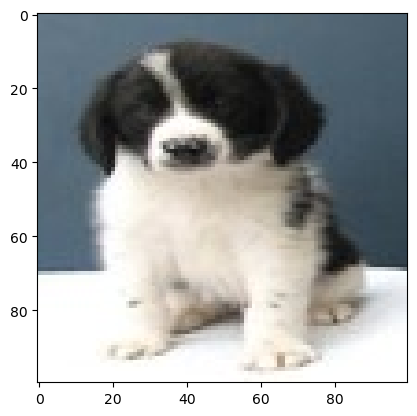

In [9]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [10]:
#Building model
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation ='relu'),
    Dense(1,activation='sigmoid')
])

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5


32/32 [==============================] - 3s 68ms/step - loss: 0.7184 - accuracy: 0.5170
Epoch 2/5
32/32 [==============================] - 2s 67ms/step - loss: 0.6744 - accuracy: 0.5895
Epoch 3/5
32/32 [==============================] - 2s 67ms/step - loss: 0.6067 - accuracy: 0.6730
Epoch 4/5
32/32 [==============================] - 2s 67ms/step - loss: 0.5415 - accuracy: 0.7250
Epoch 5/5
32/32 [==============================] - 2s 67ms/step - loss: 0.4722 - accuracy: 0.7750


In [14]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 12ms/step - loss: 0.6096 - accuracy: 0.6900


[0.6096470355987549, 0.6899999976158142]

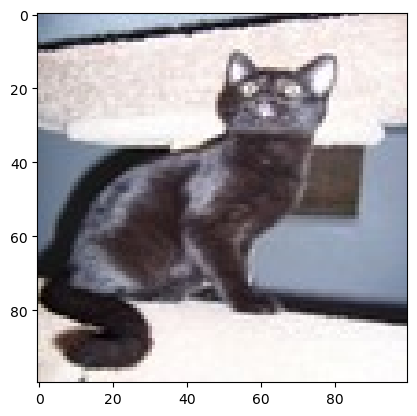

1/1 [==============================] - 0s 11ms/step
Our model predicts it as a: cat


In [16]:
#making predictions
#Sample output - 1
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred= y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred='cat'
    
print("Our model predicts it as a:", pred)

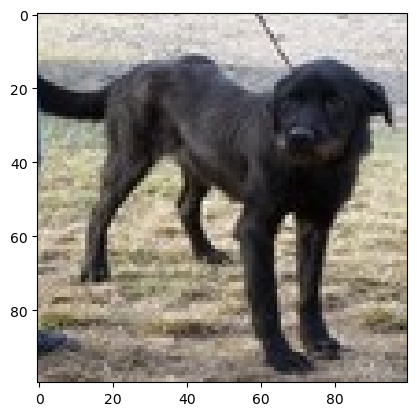

1/1 [==============================] - 0s 16ms/step
Our model predicts it as a: dog


In [20]:
#Sample output - 2
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred= y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred='cat'
    
print("Our model predicts it as a:", pred)